# Bike Project

In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv('C:/Users/andre/Documents/SPICED/unsupervised-lemon-encounter-notes/week_03/data/train.csv', sep=',', parse_dates=True, index_col=0)
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168


## Split Training

In [9]:
from sklearn.model_selection import train_test_split

In [15]:
x = df.iloc[:,:8]

In [16]:
y = df.iloc[:,8:]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=101)

In [18]:
X_train 

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
datetime,,,,,,,,
2011-06-18 19:00:00,2,0,0,2,30.34,33.335,51,7.0015
2012-09-08 17:00:00,3,0,0,3,23.78,27.275,83,12.9980
2011-05-01 17:00:00,2,0,0,2,19.68,23.485,82,16.9979
2012-11-19 00:00:00,4,0,1,1,14.76,17.425,66,15.0013
2011-05-16 09:00:00,2,0,1,1,24.60,29.545,69,12.9980
...,...,...,...,...,...,...,...,...
2011-02-08 03:00:00,1,0,1,3,11.48,13.635,93,11.0014
2012-01-12 11:00:00,1,0,1,2,13.94,17.425,81,7.0015
2012-06-13 23:00:00,2,0,1,1,25.42,31.060,50,19.0012


In [19]:
y_train

,casual,registered,count
datetime,,,
2011-06-18 19:00:00,99,227,326
2012-09-08 17:00:00,52,119,171
2011-05-01 17:00:00,60,136,196
2012-11-19 00:00:00,5,22,27
2011-05-16 09:00:00,38,156,194
...,...,...,...
2011-02-08 03:00:00,0,1,1
2012-01-12 11:00:00,18,101,119
2012-06-13 23:00:00,25,128,153


## Exploratory Data Analysis: 



### Let's check the NaNs?

In [20]:
df.isna().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

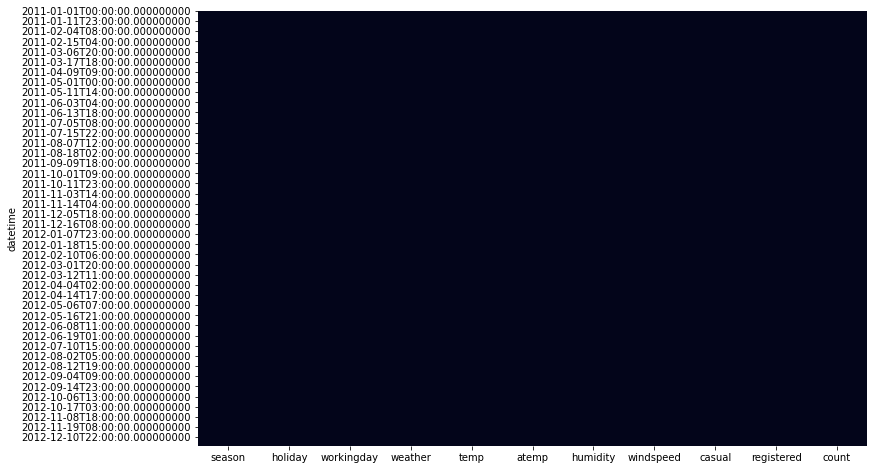

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isna(), cbar=False);

### Great the there is no "holes" in the information

## Is there any Correlation between the labels?

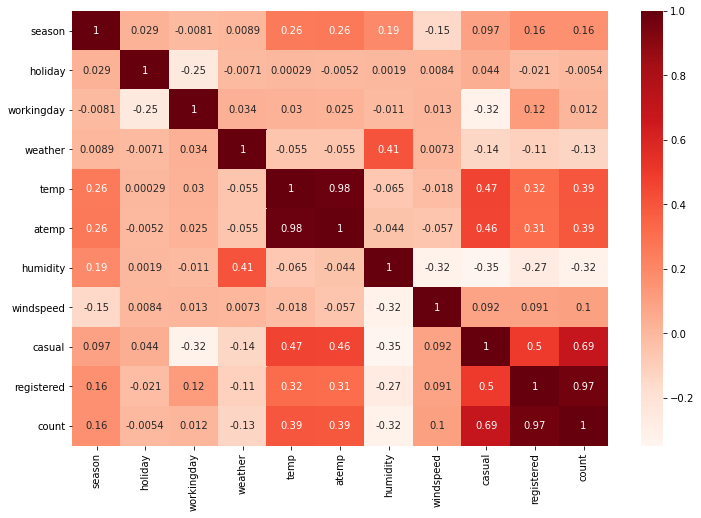

In [22]:
ax =plt.subplots(figsize=(12,8))
pearsoncorr = df.corr(method='pearson')
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='Reds',
            annot=True);

* There is some interesting positive correlation between Count and Temperature and Weather.
* Negative correlation with humidity, windspeed. 
* Holiday and Season seem relatevely independent of the demand.
* Workingday has an interesting correlation with casual and registered.

## In conslusion I'm going to use the following variables to modelize: 
* temp
* humidity
* windspeed
* workingday

## Let's see in detail how this variables moves across time

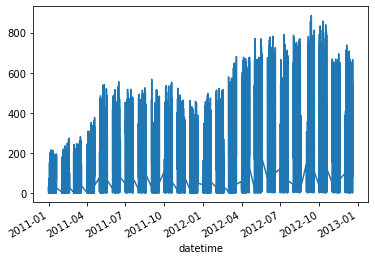

In [198]:
df['registered'].plot();


## Let`s see how behaves the demand along 1 day

<ipython-input-24-57349c7b7f33>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['hour'] = X_train.index.hour
<ipython-input-24-57349c7b7f33>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['hour'] = y_train.index.hour


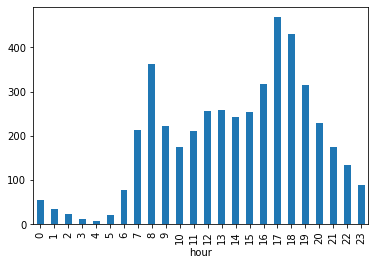

In [24]:
df['hour']= df.index.hour
X_train['hour'] = X_train.index.hour
y_train['hour'] = y_train.index.hour
df_hour= df['hour']
df.groupby('hour')['count'].mean().plot(kind='bar');

In [25]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21


## 1st Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
m = LinearRegression()

In [28]:
m.fit(X_train[['hour']], y_train['count'])

LinearRegression()

In [29]:
ypred = m.predict(X_train[['hour']])

In [30]:
y_train['ypred'] = ypred

<ipython-input-30-16b86c8e598b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['ypred'] = ypred


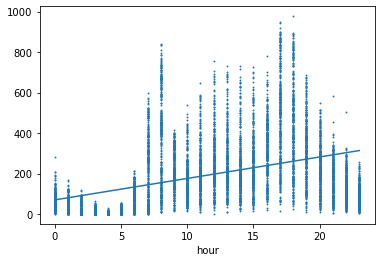

In [31]:
y_train.groupby('hour')['ypred'].mean().plot()
plt.scatter(X_train['hour'], y_train['count'], s=0.8);

In [32]:
m.score(X_train[['hour']], y_train['count'])

0.16139950199688713

### First conclusion: Hour is not enough to determine the demand

## One Hot Encoder:

In [33]:
from sklearn.preprocessing import OneHotEncoder

In [34]:
ohe = OneHotEncoder(sparse=False)

In [35]:
hour_ohe = ohe.fit_transform(X_train[['hour']])

In [36]:
m.fit(hour_ohe, y_train['count'])
y_train['ypred_ohe'] = m.predict(hour_ohe)

<ipython-input-36-ab2f77008a57>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['ypred_ohe'] = m.predict(hour_ohe)


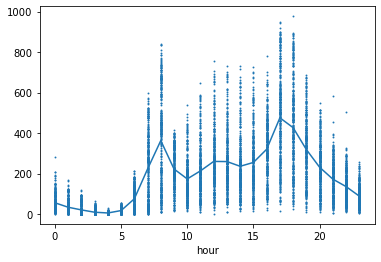

In [196]:
y_train.groupby('hour')['ypred_ohe'].mean().plot();
plt.scatter(X_train['hour'], y_train['count'], s=0.8);

In [38]:
hour_ohe

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=8)

In [40]:
hour_poly = poly.fit_transform(X_train[['hour']])

In [41]:
m.fit(hour_poly, y_train['count'])

LinearRegression()

In [42]:
y_train['ypred_poly'] = m.predict(hour_poly)

<ipython-input-42-164dcbd32ed1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['ypred_poly'] = m.predict(hour_poly)


In [43]:
y_train

,casual,registered,count,hour,ypred,ypred_ohe,ypred_poly
datetime,,,,,,,
2011-06-18 19:00:00,99,227,326,19,271.494629,318.93750,348.826149
2012-09-08 17:00:00,52,119,171,17,250.321912,475.53125,394.104694
2011-05-01 17:00:00,60,136,196,17,250.321912,475.53125,394.104694
2012-11-19 00:00:00,5,22,27,0,70.353819,56.00000,40.192872
2011-05-16 09:00:00,38,156,194,9,165.631045,222.81250,253.711883
...,...,...,...,...,...,...,...
2011-02-08 03:00:00,0,1,1,3,102.112894,9.37500,-30.687959
2012-01-12 11:00:00,18,101,119,11,186.803761,213.65625,220.756698
2012-06-13 23:00:00,25,128,153,23,313.840063,88.90625,100.352710


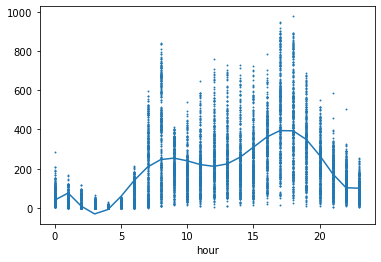

In [197]:
y_train.groupby('hour')['ypred_poly'].mean().plot();
plt.scatter(X_train['hour'], y_train['count'], s=0.8);

In [45]:
m.score(hour_poly, y_train['count'])

0.45983704399021874

### A little better than before, but still needs a lot of work, let's incorporate the other variables

## 3rd Iteration Linear Regression

In [46]:
df.head(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [47]:
x = X_train[['hour','workingday','temp','humidity','windspeed']]

In [48]:
poly_2 = PolynomialFeatures(degree=8)

In [49]:
poly_2.fit(x)

PolynomialFeatures(degree=8)

In [50]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [51]:
#  numerical_columns = ['hour','temp','humidity','windspeed']
#  categorical_columns = ['workingday']

In [52]:
#column_transformer = ColumnTransformer([('scaler', StandardScaler(), numerical_columns)], remainder = 'passthrough' )

In [53]:
#column_transformer.fit(x)
# x_fe = column_transformer.transform(x)

NameError: name 'column_transformer' is not defined

In [54]:
Xpoly = poly_2.transform(x).astype(int)


In [55]:
m.fit(Xpoly, y_train['count'])

LinearRegression()

In [56]:
Xpoly.shape

(8708, 1287)

In [57]:
y_train['ypred_Xpoly'] = m.predict(Xpoly)

<ipython-input-57-811f4c958336>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['ypred_Xpoly'] = m.predict(Xpoly)


In [58]:
m.score(Xpoly, y_train['count'])

0.7598453162283364

## Far better score than before, let's plot it...

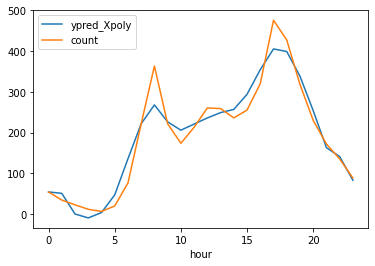

In [59]:
y_train.groupby('hour')['ypred_Xpoly'].mean().plot();
y_train.groupby('hour')['count'].mean().plot();
plt.legend();

## Scoretest

In [61]:
y_test['hour']=y_test.index.hour

<ipython-input-61-9d6e0f6bb5cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['hour']=y_test.index.hour


In [62]:
y_test

,casual,registered,count,hour
datetime,,,,
2012-07-10 13:00:00,77,203,280,13
2012-10-07 13:00:00,80,240,320,13
2012-01-11 14:00:00,3,70,73,14
2012-09-19 21:00:00,25,324,349,21
2012-04-02 04:00:00,2,2,4,4
...,...,...,...,...
2012-05-10 06:00:00,9,130,139,6
2011-07-10 21:00:00,65,162,227,21
2011-02-07 04:00:00,1,1,2,4


In [77]:
X_test['hour']=X_test.index.hour

In [65]:
xtest = X_test[['hour','workingday','temp','humidity','windspeed']]

In [66]:
poly_3 = PolynomialFeatures(degree=8)

In [67]:
poly_3.fit(xtest)

PolynomialFeatures(degree=8)

In [68]:
Xpoly_test = poly_3.transform(xtest).astype(int)


In [69]:
m.fit(Xpoly_test, y_test['count'])

LinearRegression()

In [70]:
y_test['ypred_Xpoly_test'] = m.predict(Xpoly_test)

<ipython-input-70-3ff66a0148d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['ypred_Xpoly_test'] = m.predict(Xpoly_test)


In [71]:
m.score(Xpoly_test, y_test['count'])

0.8187928815321611

In [72]:
m.coef_, m.intercept_

(array([-3.22933394e+01, -3.06002083e+02, -2.79262094e+04, ...,
         2.16857643e-09, -2.86661361e-10, -5.82213033e-09]),
 2559.1828896878947)

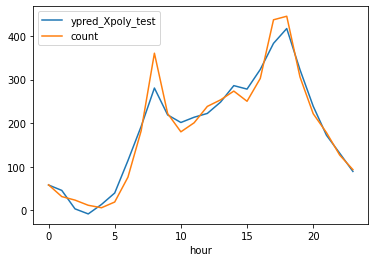

In [73]:
y_test.groupby('hour')['ypred_Xpoly_test'].mean().plot();
y_test.groupby('hour')['count'].mean().plot();

plt.legend();

## It seems that needs some adjusment on the rush hours, but it predicts particularlly good at 2pm. Also the difference between Train and test score is around 6%. So even though it's acceptable, there is still room for improvement...

# Regularization

C:\Users\andre\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42285597.645634376, tolerance: 28807.065471933856
  model = cd_fast.enet_coordinate_descent(


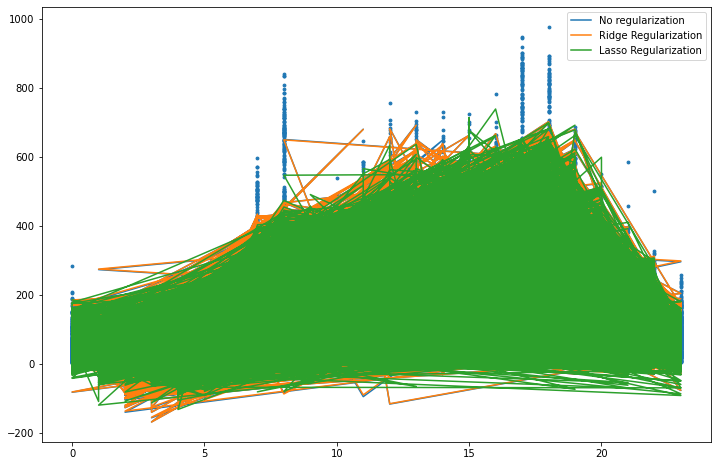

In [74]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
m = LinearRegression() #no regularization 
m_ridge = Ridge(alpha=0.5) #ridge regularization
m_lasso = Lasso(alpha=0.5) #lasso regularization

m.fit(Xpoly, y_train['count'])       
m_ridge.fit(Xpoly, y_train['count'])  
m_lasso.fit(Xpoly, y_train['count'])  

ypred_reg = m.predict(Xpoly)
ypred_ridge = m_ridge.predict(Xpoly)
ypred_lasso = m_lasso.predict(Xpoly)

plt.figure(figsize=(12, 8))
plt.scatter(x['hour'], y_train['count'], s=8)
plt.plot(x['hour'], ypred_reg)
plt.plot(x['hour'], ypred_ridge)
plt.plot(x['hour'], ypred_lasso)
plt.legend(['No regularization', 'Ridge Regularization', 'Lasso Regularization'])

# Let's try to forecast Saturday 2pm

In [106]:
X_test

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour
datetime,,,,,,,,,
2012-07-10 13:00:00,3,0,1,1,33.62,36.365,38,12.9980,13
2012-10-07 13:00:00,4,0,0,2,18.04,21.970,72,6.0032,13
2012-01-11 14:00:00,1,0,1,3,13.12,16.665,81,7.0015,14
2012-09-19 21:00:00,3,0,1,1,20.50,24.240,59,11.0014,21
2012-04-02 04:00:00,2,0,1,1,16.40,20.455,76,32.9975,4
...,...,...,...,...,...,...,...,...,...
2012-05-10 06:00:00,2,0,1,1,18.04,21.970,72,15.0013,6
2011-07-10 21:00:00,3,0,0,1,30.34,34.090,62,16.9979,21
2011-02-07 04:00:00,1,0,1,1,8.20,12.880,86,0.0000,4


## According to https://weather.com/weather/hourbyhour/l/57cc6eb02c4a08a4b126b05ffd2f41db82b40e54868394e6087105b9f5d4d83d#detailIndex4
## Saturday 17th,2pm,  Berlin


In [78]:
temp_sat = 26
humidity_sat = 68
windspeed_sat= 18

In [79]:
df['temp'].mean()

20.230859819952173

In [80]:
df['humidity'].mean()

61.88645967297446

In [81]:
df['windspeed'].mean()

12.799395406945093

In [82]:
x_dummy = {'hour':14,'workingday':0,'temp':temp_sat,'humidity':humidity_sat,'windspeed':windspeed_sat } # It's is going to be created to be able to add to the data set.

In [83]:
x_dummy_df = pd.DataFrame(x_dummy, index=[len(df)])

In [84]:
x_dummy_df

,hour,workingday,temp,humidity,windspeed
10886,14,0,26,68,18


In [85]:
poly_4 = PolynomialFeatures(degree=8)

In [86]:
poly_4.fit(x_dummy_df)

PolynomialFeatures(degree=8)

In [87]:
Xpoly_dummy = poly_4.transform(x_dummy_df).astype(int)

In [88]:
ypred_sat= m.predict (Xpoly_dummy)

In [89]:
ypred_sat

array([442.29023452])

# Under this conditions... 
* temp_sat = 26 
* humidity_sat = 68 
* windspeed_sat= 18 
# the forecast says that it is expected **442** bycicles for that hour


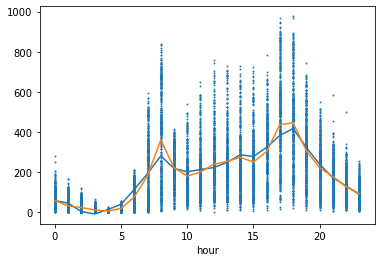

In [94]:
y_test.groupby('hour')['ypred_Xpoly_test'].mean().plot();
y_test.groupby('hour')['count'].mean().plot();

plt.scatter(df['hour'], df['count'], s=0.8);

# RMSLE Train and Test 

In [90]:
from sklearn.metrics import mean_squared_log_error


In [91]:
def rmsle(p,a):
    return np.sqrt(mean_squared_log_error(p,a))

In [92]:
ypred_rmsle_train= y_train['ypred_Xpoly']
ypred_rmsle_train[ypred_rmsle_train < 0] = 0.0

<ipython-input-92-a393bd25d71e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ypred_rmsle_train[ypred_rmsle_train < 0] = 0.0
C:\Users\andre\anaconda3\lib\site-packages\pandas\core\series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


In [95]:
rmsle(y_train['count'],ypred_rmsle_train)

0.9576581915844316

In [96]:
ypred_rmsle_test= y_test['ypred_Xpoly_test']
ypred_rmsle_test[ypred_rmsle_test < 0] = 0.0

<ipython-input-96-3dcd572f9f13>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ypred_rmsle_test[ypred_rmsle_test < 0] = 0.0
C:\Users\andre\anaconda3\lib\site-packages\pandas\core\series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


In [97]:
rmsle(y_test['count'],ypred_rmsle_test)

0.9447592549914082

## Kaggle Submission

In [114]:
df_kag=pd.read_csv('C:/Users/andre/Documents/SPICED/unsupervised-lemon-encounter-notes/week_03/data/test.csv', sep=',', parse_dates=True, index_col=0)
df_kag

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
datetime,,,,,,,,
2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014


In [115]:
x_kag = df_kag.iloc[:,:8]

In [116]:
y_kag = df_kag.iloc[:,8:]

In [118]:
x_kag['hour'] = x_kag.index.hour

In [121]:
x_kag_poly = x_kag[['hour','workingday','temp','humidity','windspeed']]

In [122]:
poly_kag = PolynomialFeatures(degree=8)

In [123]:
poly_kag.fit(x_kag_poly)

PolynomialFeatures(degree=8)

In [126]:
Xpoly_kag = poly_kag.transform(x_kag_poly).astype(int)

In [176]:
y_pred_kag= m.predict(Xpoly_kag)

In [194]:
kag_df = {"datetime": y_kag.index,
                 "count": y_pred_kag}
kag_df = pd.DataFrame(kag_df)
kag_df['count'][kag_df['count']<0] = 0.0
kag_df

<ipython-input-194-ead50b5a1f94>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kag_df['count'][kag_df['count']<0] = 0.0


,datetime,count
0,2011-01-20 00:00:00,24.726713
1,2011-01-20 01:00:00,37.755833
2,2011-01-20 02:00:00,0.000000
3,2011-01-20 03:00:00,9.889049
4,2011-01-20 04:00:00,32.834362
...,...,...
6488,2012-12-31 19:00:00,191.903767
6489,2012-12-31 20:00:00,135.007038
6490,2012-12-31 21:00:00,75.157917
6491,2012-12-31 22:00:00,97.432209


In [195]:
kag_df.to_csv("kag_df_bikes.csv",index=False)

## Kaggle Score 1.105

# Let's try to improve a little bit the model with Random Forests

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [170]:
rf = RandomForestClassifier(n_estimators=500, max_depth=10, min_samples_leaf=3)

In [171]:
rf.fit(x,y_train['count'])

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=500)

In [172]:
ypred_rf = rf.predict(x)

In [173]:
accuracy_score(ypred_rf,y_train['count'])

0.7103812586127699

## It's acceptable but not so good as with linear regression

In [174]:
rf.feature_importances_

array([0.25919966, 0.05583824, 0.24176152, 0.23587926, 0.20732132])

## Maybe I can improve it using Grid Search

In [105]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rf_opti = RandomForestClassifier()

In [ ]:
hyperparams = {
    'max_depth': [2, 5, 7, 10], 
    'n_estimators': [50, 100,150,200],
    'min_samples_leaf': [1,2,3,4]
}

In [ ]:
g = GridSearchCV(rf_opti, hyperparams, cv=10, scoring='r2')

In [ ]:
g.fit(x, y_train['count'])

In [ ]:
g.best_params_    

In [ ]:
pd.DataFrame(g.cv_results_)

In [ ]:
rf_best = g.best_estimator_

In [ ]:
rf_best.predict(Xtest)

In [ ]:
rf_best.score(Xtest, ytest)